In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('.\data\GSM1173493_cell-1.txt', sep='\t')

In [4]:
df.head(10)

,chrom1,coord1,chrom2,coord2
0,1,3023035,1,14942225
1,1,3065457,1,19796342
2,1,3312156,1,5315667
3,1,3377904,1,24338979
4,1,3390558,1,20722058
5,1,3409175,1,4615209
6,1,3417953,1,3418788
7,1,3486876,1,5579145
8,1,3537059,1,4357966
9,1,3551972,1,5080897


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30665 entries, 0 to 30664
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   chrom1  30665 non-null  object
 1   coord1  30665 non-null  int64 
 2   chrom2  30665 non-null  object
 3   coord2  30665 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 958.4+ KB


In [13]:
def generate_sc_hic_contact_matrix(data, chromosome, bin_size=1000000):

    chromosome_data = data[(data['chrom1'] == chromosome) & (data['chrom2'] == chromosome)]
    
    coords = np.concatenate([chromosome_data['coord1'].values, chromosome_data['coord2'].values])
    min_coord = min(coords)
    max_coord = max(coords)
    
    num_bins = int((max_coord - min_coord) / bin_size) + 1
    
    contact_matrix = np.zeros((num_bins, num_bins), dtype=int)
    
    for _, row in chromosome_data.iterrows():
        coord1 = row['coord1']
        coord2 = row['coord2']
        bin_index1 = (coord1 - min_coord) // bin_size
        bin_index2 = (coord2 - min_coord) // bin_size
        contact_matrix[bin_index1, bin_index2] += 1
        contact_matrix[bin_index2, bin_index1] += 1
    
    plt.figure(figsize=(8, 6))
    plt.imshow(contact_matrix, cmap='Reds', interpolation='nearest')
    plt.colorbar()
    plt.title('scHi-C Contact Matrix for chromosome number {}'.format(chromosome))
    plt.xlabel('Genomic Bins')
    plt.ylabel('Genomic Bins')

    plt.show()



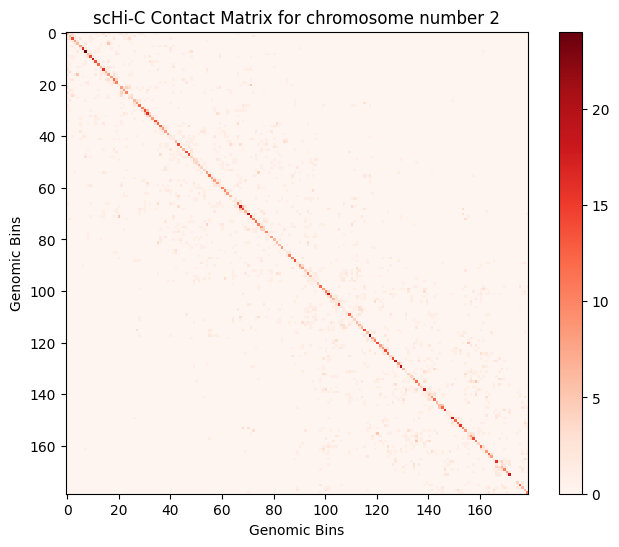

In [14]:
generate_sc_hic_contact_matrix(df, "2")

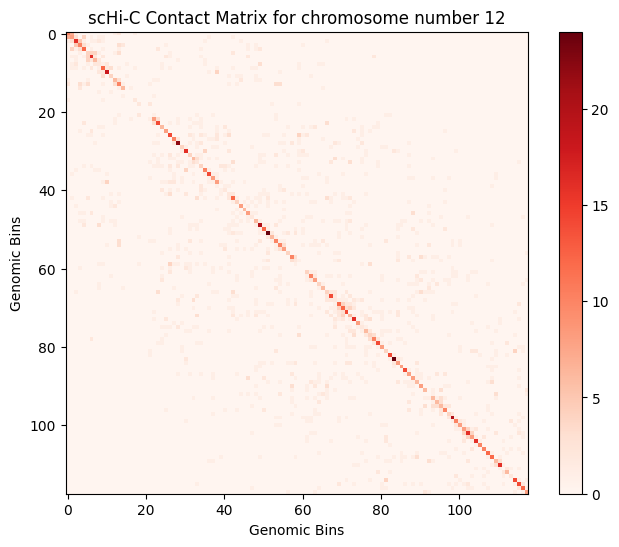

In [15]:
generate_sc_hic_contact_matrix(df, '12')